# 💳📊 Customer Segmentation in Retail Banking using Hierarchical Clustering (Ward’s Method) 🏦


### 🏦 Business Problem Statement

The retail bank serves thousands of customers with diverse financial behaviors.
Currently, all customers receive the same offers and promotions, leading to low engagement and poor conversion rates.

The bank’s management wants to:

Identify natural customer groups based on income, spending patterns, and account activity.

Design personalized financial products (e.g., credit cards, loans, wealth management).

Improve marketing efficiency and customer satisfaction.

👉 By applying hierarchical clustering (Ward’s method), the bank can discover meaningful customer segments and create targeted strategies instead of a “one-size-fits-all” approach.

In [2]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering



In [3]:
# -----------------------------
# Step 1: Load Dataset
# -----------------------------
df = pd.read_csv("bank_customers.csv")
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Transactions_Per_Month,Account_Balance
0,C1,25,30000,65,25,15000
1,C2,32,45000,40,18,22000
2,C3,40,60000,30,15,35000
3,C4,23,28000,75,28,12000
4,C5,35,50000,50,20,27000


In [7]:

# Select numerical features for clustering
features = ["Age", "Annual_Income", "Spending_Score", 
            "Transactions_Per_Month", "Account_Balance"]
X = df[features]
X.head()

,Age,Annual_Income,Spending_Score,Transactions_Per_Month,Account_Balance
0,25,30000,65,25,15000
1,32,45000,40,18,22000
2,40,60000,30,15,35000
3,23,28000,75,28,12000
4,35,50000,50,20,27000


In [18]:

# -----------------------------
# Step 2: Standardize Data
# -----------------------------
# Why? Because features like Age (25–60) and Income (30k–100k) 
# are on very different scales. 
# Standardization ensures fair contribution to distance calculation.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5,:]

array([[-1.21865191, -1.14437637,  1.01538746,  1.20174345, -0.91156298],
       [-0.5820427 , -0.46856355, -0.20503016, -0.02333482, -0.58983487],
       [ 0.14551068,  0.20724926, -0.69319721, -0.54836837,  0.00766019],
       [-1.40054026, -1.23448474,  1.50355451,  1.72677699, -1.04944646],
       [-0.30921019, -0.24329261,  0.28313689,  0.32668754, -0.36002908]])

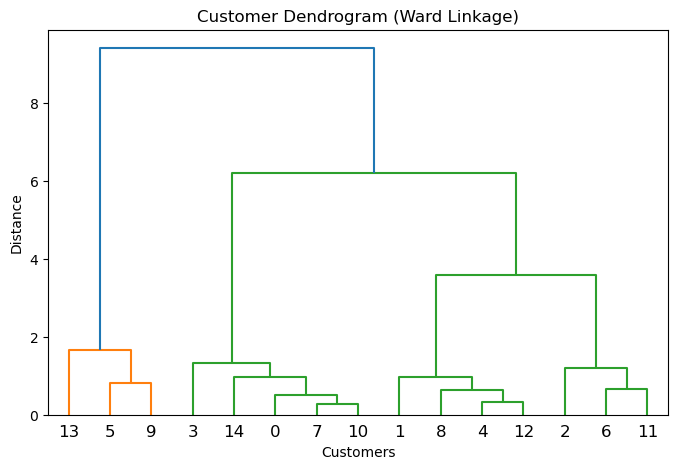

In [19]:


# -----------------------------
# Step 3: Dendrogram
# -----------------------------
# Why? A dendrogram shows how clusters are merged step-by-step
# and helps decide the optimal number of clusters.
plt.figure(figsize=(8, 5))
dendrogram(linkage(X_scaled, method="ward"))
plt.title("Customer Dendrogram (Ward Linkage)")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [22]:
X.head(10)

,Age,Annual_Income,Spending_Score,Transactions_Per_Month,Account_Balance
0,25,30000,65,25,15000
1,32,45000,40,18,22000
2,40,60000,30,15,35000
3,23,28000,75,28,12000
4,35,50000,50,20,27000
5,52,80000,20,12,60000
6,45,70000,35,14,45000
7,29,32000,70,24,14000
8,38,48000,45,19,25000
9,55,90000,15,10,70000


In [20]:

# -----------------------------
# Step 4: Apply Agglomerative Clustering
# -----------------------------
# Based on the dendrogram, assume we choose 3 clusters
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = agg.fit_predict(X_scaled)

# Add cluster labels to dataset
df["Cluster"] = labels
print("\nCluster Assignments:\n", df[["CustomerID", "Cluster"]])




Cluster Assignments:
    CustomerID  Cluster
0          C1        2
1          C2        0
2          C3        0
3          C4        2
4          C5        0
5          C6        1
6          C7        0
7          C8        2
8          C9        0
9         C10        1
10        C11        2
11        C12        0
12        C13        0
13        C14        1
14        C15        2


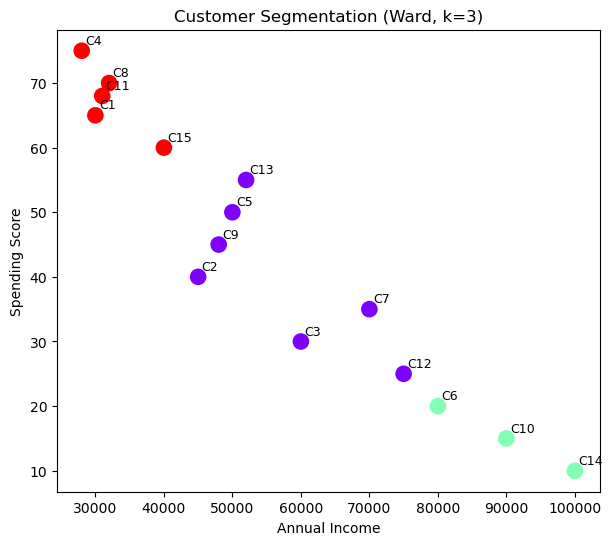

In [21]:
# -----------------------------
# Step 5: Visualize Clusters
# -----------------------------
# Plotting 2 key features (Annual Income vs Spending Score) 
# helps interpret clusters visually.
plt.figure(figsize=(7, 6))
plt.scatter(df["Annual_Income"], df["Spending_Score"], 
            c=labels, cmap="rainbow", s=120)

# Annotate customer IDs on the plot
for i, row in df.iterrows():
    plt.text(row["Annual_Income"]+500, row["Spending_Score"]+1, 
             row["CustomerID"], fontsize=9)

plt.title("Customer Segmentation (Ward, k=3)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


### inference
Cluster 0: Young customers, low income but high spending score. → Good target for credit cards, small loans, or lifestyle offers.

Cluster 1: Middle-aged, moderate income, average spending. → Stable group, target with saving schemes and bundled banking products.

Cluster 2: Older customers, high income but low spending score. → Retain with wealth management, investment products, retirement plans.